# Importing libraries

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
import os
import random
import cv2

# Data directories setup

In [47]:
train_dir = "data/train"
test_dir = "data/test"

# Emotion Categories

In [48]:
emotion_categories = ["angry", "happy", "neutral"]

# Loading the data

### Training Data

In [49]:
training_data = []

for emotion in emotion_categories:
    path = os.path.join(train_dir, emotion)
    class_num = emotion_categories.index(emotion)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        training_data.append([img_array, class_num])

In [50]:
testing_data = []

for emotion in emotion_categories:
    path = os.path.join(test_dir, emotion)
    class_num = emotion_categories.index(emotion)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        testing_data.append([img_array, class_num])

# Shuffling the data

In [51]:
random.shuffle(training_data)
random.shuffle(testing_data)

In [52]:
print(f"training_data : {len(training_data)}, testing_data : {len(testing_data)}")

training_data : 16175, testing_data : 3965


# Splitting the data into features and labels

In [53]:
x_train = []
y_train = []

for feature, label in training_data:
    x_train.append(feature)
    y_train.append(label)

In [71]:
y_train.shape

(12940,)

In [54]:
x_test = []
y_test = []

for feature, label in testing_data:
    x_test.append(feature)
    y_test.append(label)

# Converting the data into numpy arrays

In [55]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [56]:
x_test = np.array(x_test)
y_test = np.array(y_test)

# Reshaping the data

In [57]:
x_train = x_train.reshape(-1, 48, 48, 1)
x_test = x_test.reshape(-1, 48, 48, 1)

# Transforming the labels

In [58]:
# from keras.utils import to_categorical

In [59]:
# y_train = to_categorical(y_train, num_classes=7)
# y_test = to_categorical(y_test, num_classes=7)

# Normalizing the data

In [60]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [61]:
x_train.shape

(16175, 48, 48, 1)

In [62]:
y_train.shape

(16175,)

# Splitting the data into validation set

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Building the model

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [66]:
model = Sequential()

In [67]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

In [68]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,331 (1.36 MB)

 Trainable params: 355,331 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - accuracy: 0.4447 - loss: 1.0695 - val_accuracy: 0.5082 - val_loss: 1.0155
Epoch 2/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - accuracy: 0.5228 - loss: 0.9859 - val_accuracy: 0.6173 - val_loss: 0.8450
Epoch 3/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.6060 - loss: 0.8635 - val_accuracy: 0.6628 - val_loss: 0.7541
Epoch 4/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.6446 - loss: 0.7921 - val_accuracy: 0.6788 - val_loss: 0.7058
Epoch 5/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.6763 - loss: 0.7456 - val_accuracy: 0.7070 - val_loss: 0.6597
Epoch 6/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.6968 - loss: 0.7056 - val_accuracy: 0.7181 - val_loss: 0.6508
Epoch 7/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - accuracy: 0.7052 - loss: 0.6740 - val_accuracy: 0.7230 - val_loss: 0.6263
Epoch 8/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.7208 - loss: 0.6513

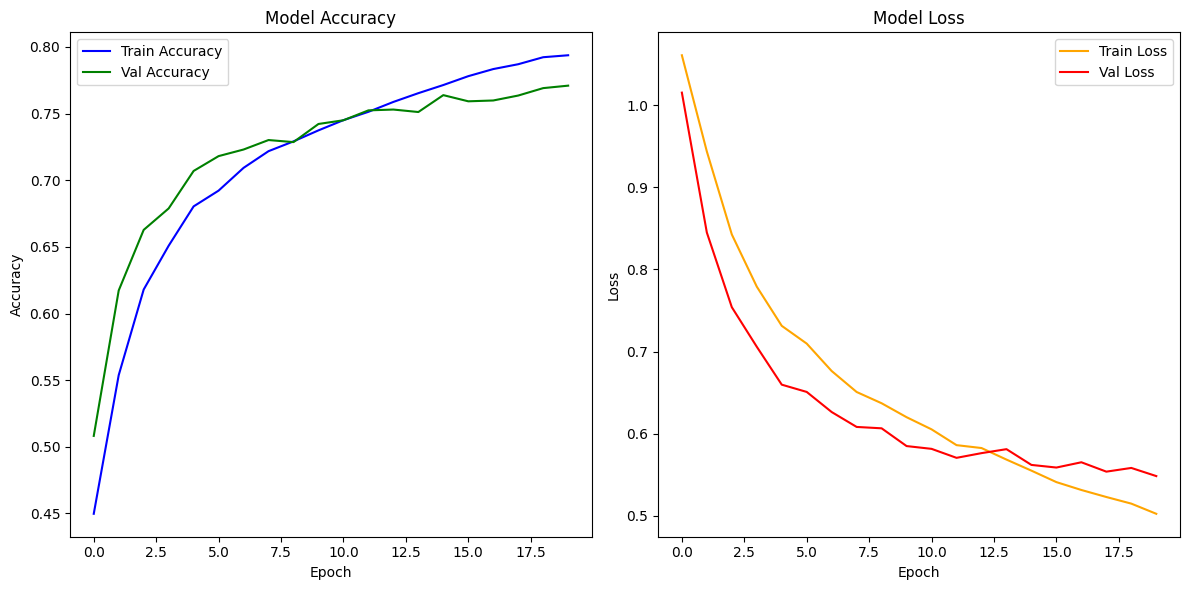

In [72]:
# Retrieve the data from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a figure with a specific size
plt.figure(figsize=(12, 6))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
plt.plot(history.epoch, train_accuracy, color='blue', label='Train Accuracy')
plt.plot(history.epoch, val_accuracy, color='green', label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)  # (rows, columns, panel number)
plt.plot(history.epoch, train_loss, color='orange', label='Train Loss')
plt.plot(history.epoch, val_loss, color='red', label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [73]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7826 - loss: 0.5378
Test Loss: 0.5464421510696411
Test Accuracy: 0.7737705111503601


In [74]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


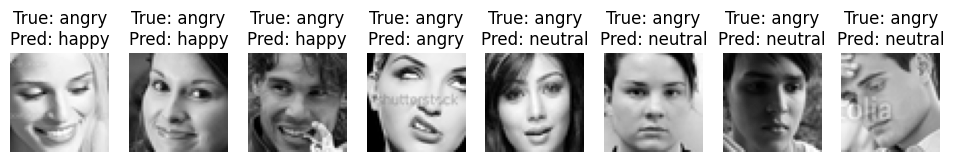

In [77]:
num_images = 8
plt.figure(figsize=(12, 8))

for i in range(num_images):
    true_label = np.argmax(y_test[i])
    predicted_label = predicted_classes[i]

    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {emotion_categories[true_label]}\nPred: {emotion_categories[predicted_label]}")
    plt.axis('off')

plt.show()

In [78]:
model.save('emotion_detector.h5')